In [140]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import networkx as nx
import igraph as ig
from sklearn.cluster import SpectralClustering
from sklearn import metrics
import json
import community

In [142]:
from util.similarities_util import *
from util.load_data_util import *
from util.metrics_util import *
from util.clustering_util import Louvain, Spectral

In [143]:
f = open('paths.json')
data = json.load(f)
data_path = data['data_path']

In [144]:
G = loadData_networkX(data_path)

networkX Graph loaded. DiGraph with 5881 nodes and 35592 edges


In [145]:
g = loadData_iGraph(data_path)

iGraph Graph loaded, V: 5881 E: 35592


Negative sub-networks

In [146]:
negativeG = load_subnetwork_networkX(data_path, True)

networkX Sub-Graph loaded.


In [147]:
negativeg = load_subnetwork_iGraph(data_path, True)

iGraph Sub-Graph loaded.


# Similarity

In [148]:
A = np.array(g.get_adjacency().data)
adamic_adar_sigma = [adamic_adar_sim(A, True, True), adamic_adar_sim(A, False, True)]
print("Done Adamic Adar")
jaccard_sigma = [jaccard_sim(A, True, True), jaccard_sim(A, False, True)]
print("Done Jaccard")
pearson_sigma = [pearson_sim(A, True, True), pearson_sim(A, False, True)]
print("Done Pearson")
cosine_sigma = [cosine_sim(A, True, True), cosine_sim(A, False, True)]
print("Done Cosine")
sigmas = [adamic_adar_sigma, jaccard_sigma, pearson_sigma, cosine_sigma]


  0%|                                                                                                        | 5/5881 [00:00<11:16,  8.69it/s]/Users/serenaong/Documents/168_project_code/util/similarities_util.py:116: RuntimeWarning: divide by zero encountered in log
  g_out = 'in' if col else 'out'
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 5881/5881 [01:53<00:00, 51.71it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'data_path.json'

For verifying the similarity matrices.

In [ ]:
for name, sigma in zip(['Adamic-Adar', 'Jaccard', 'Pearson', 'Cosine'], sigmas):
    for o, s in zip(['Col/In', 'Row/Out'], sigma):
        print(f"{name} {o}: {s.shape}")
        symmetric = np.allclose(s, s.T, rtol=1e-05, atol=1e-08)
        if symmetric:
            print("\t Symmetric")
        else:
            print("\t Not Symmetric")

(5881, 5881)


True

# Community Detection

## Louvain method

In [ ]:
communities = {}
for name, sigma in zip(['Adamic-Adar', 'Jaccard', 'Pearson', 'Cosine'], sigmas):
    c = []
    for s in sigma:
        louvain = Louvain(s)
        lc, _ = louvain.run
        c.append(lc)

for 

In [ ]:
big_clusters = [clusters[i] for i in range(len(clusters)) if (len(clusters[i]) > 1)]
print(len(clusters), modularity)
# print(clusters)
print(big_clusters)

3678 0.04575416321260217
[[18, 36, 38, 96, 114, 188, 249, 348, 379, 412, 419, 719, 4457], [22, 1085, 1533, 1547, 1548, 1608, 1613, 1616], [25, 265], [30, 75, 123, 146, 156, 172, 234, 261, 269, 277, 283, 336, 381, 485, 769, 840, 973, 4175], [32, 45, 206, 481, 728, 903, 1164, 1253, 1255, 1280, 1297, 1315, 1325, 1335, 1371, 1375, 1383, 1394, 1414, 1419, 1437, 1453, 1478, 1491, 1507, 1516, 1521, 1576, 1582, 1598, 1639, 1646, 1672, 1700, 1788, 1801, 1863, 1948, 1988, 2018, 2125, 2144, 2199, 2216, 2260, 2286, 2292, 2361, 2421, 2432, 2456, 2464, 2581, 2592, 2595, 2627, 2646, 2653, 2694, 2701, 2872, 2955, 3001, 3024, 3078, 3103, 3155, 3185, 3228, 3259, 3267, 3268, 3295, 3340, 3342, 3366, 3367, 3382, 3465, 3474, 3484, 3488, 3495, 3509, 3510, 3592, 3654, 3706, 3777, 3960, 4051, 4063, 4064, 4081, 4083, 4107, 4125, 4128, 4144, 4230, 4242, 4250, 4257, 4282, 4301, 4338, 4339, 4366, 4374, 4394, 4550, 4587, 4639, 4660, 4687, 4739, 4740, 4746, 4800, 4806, 4808], [48, 49, 81, 89, 117, 749, 1443, 4795], 

In [ ]:
G = nx.from_numpy_array(jaccard_sigma)
louvain_partition = community.community_louvain.best_partition(G, weight='weight')
modularity2 = community.modularity(louvain_partition, G, weight='weight')
print("The modularity Q based on networkx is {}".format(modularity2))

In [117]:
L_adam = Louvain(adamic_adar_sigma_row)
clusters_adam, modularity_adam = L.run()

In [118]:

big_clusters_adam = [clusters_adam[i] for i in range(len(clusters_adam)) if (len(clusters_adam[i]) > 1)]
print(len(clusters), modularity)
# print(clusters)
print(len(big_clusters))

3678 0.04575416321260217
308


## Spectural Clustering

In [ ]:
def spectralClustering(sim_matrix):
  sc = SpectralClustering(7, affinity='precomputed', n_init=100, assign_labels='discretize')
  sc.fit(sim_matrix)
  return sc
# Compare ground-truth and clustering-results
# print('spectral clustering')
# print(sc.labels_)
# print('just for better-visualization: invert clusters (permutation)')
# print(np.abs(sc.labels_ - 1))

# # Calculate some clustering metrics
# print(metrics.adjusted_rand_score(gt, sc.labels_))
# print(metrics.adjusted_mutual_info_score(gt, sc.labels_))

# Visualizations

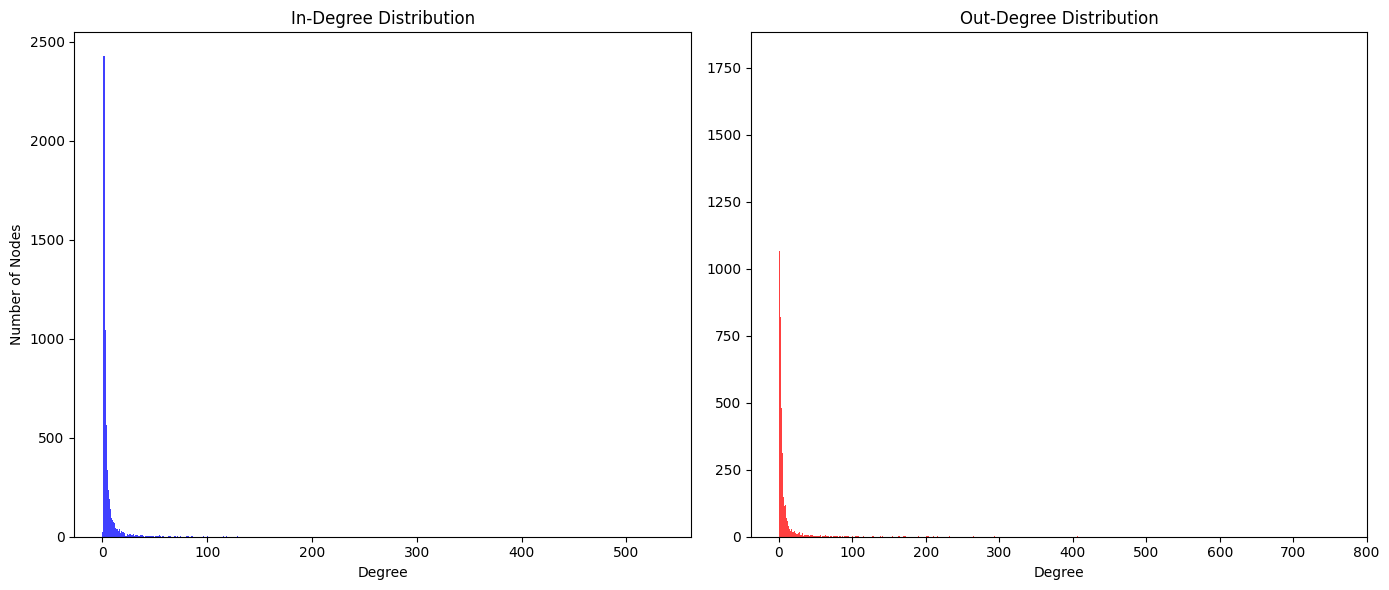

In [ ]:
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.hist(in_degrees, bins=range(min(in_degrees), max(in_degrees) + 1), alpha=0.75, color='blue')
plt.title('In-Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.subplot(122)
plt.hist(out_degrees, bins=range(min(out_degrees), max(out_degrees) + 1), alpha=0.75, color='red')
plt.title('Out-Degree Distribution')
plt.xlabel('Degree')

plt.tight_layout()
plt.show()

In [ ]:
# plt.figure(figsize=(15, 15))

# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos, node_color='cyan', node_size=5, alpha=0.1)
# nx.draw_networkx_edges(G, pos, width=2.0, alpha=1)

# nx.draw_networkx(G,node_color = 'cyan')
# plt.show()
